In [1]:
import sys, os, pandas
import uproot
import matplotlib.pyplot as plt

In [2]:
filename = "/scratch/mmarcheg/lumi_data/Run300806.root"
#plot_dir = "../ntuplesPixel/plots/" + (filename.split("/")[-1]).split(".")[-2] + "/"
#os.mkdir(plot_dir)
print("Opening %s" % filename)
file = uproot.open(filename)
tree = file[b'a/tree;1']

Opening /scratch/mmarcheg/lumi_data/Run300806.root


In [3]:
df_grid = tree.pandas.df([b'detR', b'layer', b'ladder', b'size', b'cols', b'rows', b'pos_x', b'pos_y', b'x', b'y', b'global_phi'])

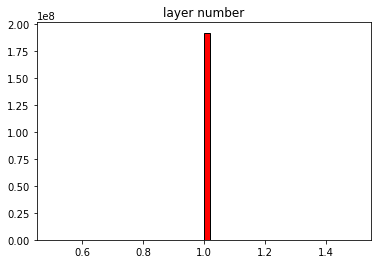

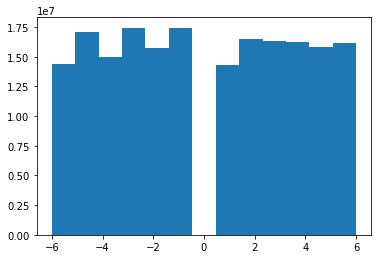

In [6]:
plt.hist(df_grid['layer'], bins=50, color="red", ec="black", histtype="stepfilled")
plt.title("layer number")
plt.savefig("../ntuplesPixel/plots/layer_number.png", format="png", dpi=300)
plt.show()
plt.hist(df_grid['ladder'], bins=13)
plt.show()

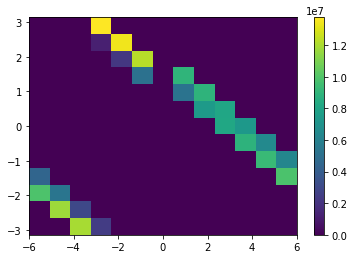

In [7]:
plt.hist2d(df_grid['ladder'], df_grid['global_phi'], bins=13)
plt.colorbar()
plt.show()

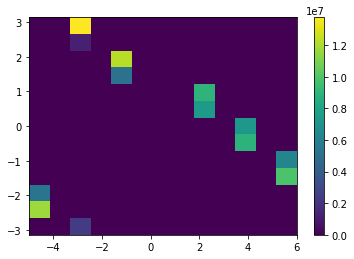

In [8]:
df_selected = df_grid.query('((ladder % 2 == 0) & (ladder > 0)) | ((ladder % 2 != 0) & (ladder < 0))')
df_selected2 = df_grid.query('((ladder % 2 == 0) & (ladder < 0)) | ((ladder % 2 != 0) & (ladder > 0))')
plt.hist2d(df_selected['ladder'], df_selected['global_phi'], bins=13)
plt.colorbar()
plt.show()

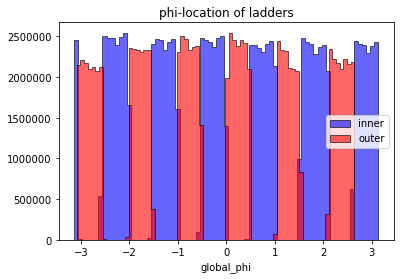

In [18]:
plt.hist(df_selected['global_phi'], bins=75, color="blue", ec="black", alpha=0.6, histtype="stepfilled", label="inner")
plt.hist(df_selected2['global_phi'], bins=75, color="red", ec="black", alpha=0.6, histtype="stepfilled", label="outer")
plt.legend(loc="right")
plt.title("phi-location of ladders")
plt.xlabel("global_phi")
plt.savefig("../ntuplesPixel/plots/ladder_phi.png", format="png", dpi=300)
plt.show()

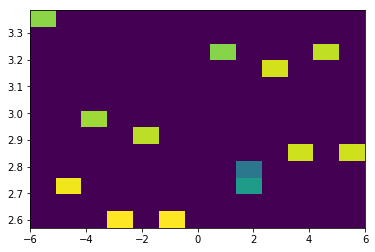

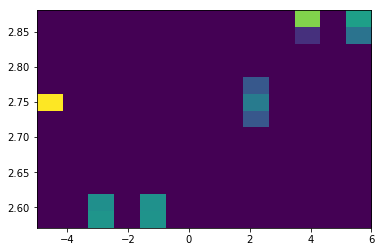

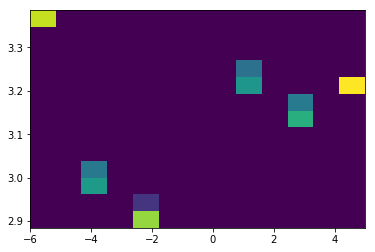

In [15]:
plt.hist2d(df_grid['ladder'], df_grid['detR'], bins=13, label="l=-5,-3,-1,2,4,6")
plt.show()
plt.hist2d(df_selected['ladder'], df_selected['detR'], bins=13, label="l=-5,-3,-1,2,4,6")
plt.show()
plt.hist2d(df_selected2['ladder'], df_selected2['detR'], bins=13, label="l=-6,-4,-2,1,3,5")
plt.show()
# So I showed that
# l=-5,-3,-1,2,4,6  -->  Inner ladders
# l=-6,-4,-2,1,3,5  -->  Outer ladders

In [19]:
df_grid['rows'].mean()

3.1345080990917786